In [1]:
import boto3

dynamodb = boto3.resource('dynamodb', region_name='us-east-1')
table = dynamodb.Table('updated_rice_growth')



In [3]:
import pandas as pd

response = table.scan()
items = response.get('Items', [])

# 如果資料不為空，使用 pandas 顯示資料
if items:
    df = pd.DataFrame(items)
    print(df)
else:
    print("沒有找到資料")

    record_time fertility_cycle variety_number height tillering
0             0               5     Taoyuan3_1   15.0         0
1             2               8     Taoyuan3_1   36.0         3
2             4               9     Taoyuan3_1   50.0         4
3             6              11     Taoyuan3_1   60.0         8
4             8              13     Taoyuan3_1   66.0        13
..          ...             ...            ...    ...       ...
115           2               7     Tainan11_1   28.0         2
116           4              11     Tainan11_1   43.0         5
117           6              13     Tainan11_1   78.0         8
118           8              15     Tainan11_1   78.0        12
119          10              17     Tainan11_1  103.0        17

[120 rows x 5 columns]


In [9]:
df[['variety', 'number']] = df['variety_number'].str.split('_', expand=True)

# 刪除 'variety_number' 欄位
df = df.drop(columns=['variety_number'])

print(df.head(10))

  record_time fertility_cycle height tillering   variety number
0           0               5   15.0         0  Taoyuan3      1
1           2               8   36.0         3  Taoyuan3      1
2           4               9   50.0         4  Taoyuan3      1
3           6              11   60.0         8  Taoyuan3      1
4           8              13   66.0        13  Taoyuan3      1
5          10              17  100.0        18  Taoyuan3      1
6           0               4   12.0         0  Taoyuan3      8
7           2               6   25.0         2  Taoyuan3      8
8           4               9   52.0         4  Taoyuan3      8
9           6              11   59.0         7  Taoyuan3      8


In [14]:
# 使用 groupby 根據 'variety' 分組
grouped = df.groupby('variety')

# 生成每個品種的資料集
varieties_data = {variety: group for variety, group in grouped}

print(varieties_data['Taoyuan3'].head(60))

    record_time fertility_cycle height tillering   variety number
0             0               5   15.0         0  Taoyuan3      1
1             2               8   36.0         3  Taoyuan3      1
2             4               9   50.0         4  Taoyuan3      1
3             6              11   60.0         8  Taoyuan3      1
4             8              13   66.0        13  Taoyuan3      1
5            10              17  100.0        18  Taoyuan3      1
6             0               4   12.0         0  Taoyuan3      8
7             2               6   25.0         2  Taoyuan3      8
8             4               9   52.0         4  Taoyuan3      8
9             6              11   59.0         7  Taoyuan3      8
10            8              13   77.0         9  Taoyuan3      8
11           10              14   94.0        10  Taoyuan3      8
18            0               4   11.5         0  Taoyuan3      9
19            2               6   26.0         2  Taoyuan3      9
20        

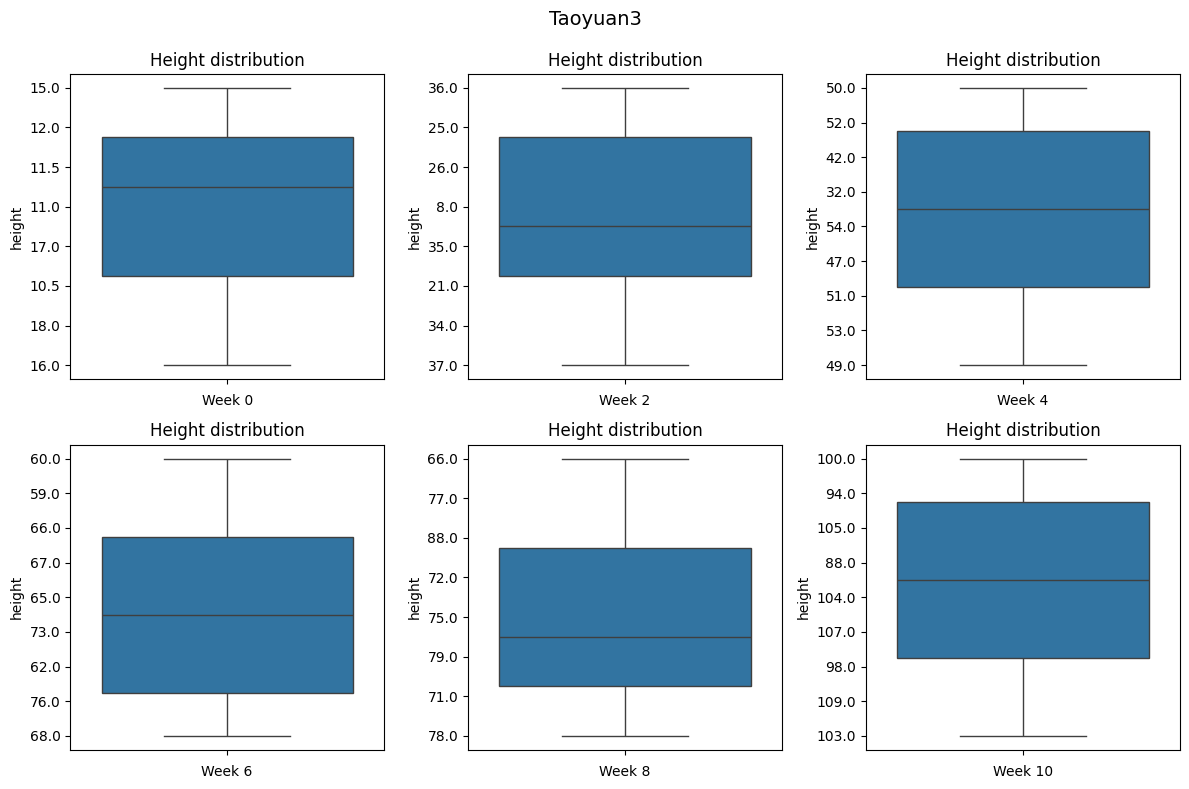

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 設定畫布的大小
plt.figure(figsize=(12, 8))

# 調查週數的列表
weeks = [0, 2, 4, 6, 8, 10]

# 使用迴圈，對每個調查週數繪製箱型圖
for i, week in enumerate(weeks, 1):
    # 篩選出對應週數的資料
    week_data = varieties_data['Taoyuan3'][varieties_data['Taoyuan3']['record_time'] == week]

    # 繪製箱型圖，將每個箱型圖繪製在同一張圖上
    plt.subplot(2, 3, i)  # 在 2x3 的子圖網格中繪製，i 決定位置
    sns.boxplot(y='height', data=week_data)
    
    # 設定標題
    plt.title('Height distribution', fontsize=12)
    plt.xlabel(f'Week {week}', fontsize=10)

# 設定整體圖表標題
plt.suptitle('Taoyuan3', fontsize=14)

# 顯示圖表
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # 調整標題位置，避免重疊
plt.show()
